In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
from parseData import ReadLocation
from parseData import ReadData

In [2]:
def PlotRotation(data):
    x = []
    yx = []
    yy = []
    yz = []
    for i in range(24):
        #label = data['label']
        #x.append(label)
        yx.append(data[2+i*3])
        yy.append(data[2+(i*3)+1])
        yz.append(data[2+(i*3)+2])

    plt.scatter(x=x, y=yx, color='r')
    plt.scatter(x=x, y=yy, color='g')
    plt.scatter(x=x, y=yz, color='b')
    return

In [3]:
def CollectLocations(data):
    x = []
    y = []
    z = []
    locations = []
    for i in range(24):
        x.append(data[i*6])
        y.append(data[(i*6)+1])
        z.append(data[(i*6)+2])
    locations = [x, y, z]
    return locations

In [4]:
def DrawLine(location, slice, fig):
    x = []
    y = []
    z = []
    for i in slice:
        x.append(location[0][i])
        y.append(location[1][i])
        z.append(location[2][i])
    fig.plot(x, y, z, color='black')
    return

In [5]:
def VisualizeLocation(data, line_points):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    loc = CollectLocations(data)
    ax.set_title(data[0])
    for line in line_points:
        DrawLine(loc, line, ax)
    ax.scatter(loc[0], loc[1], loc[2], color='r')
    return

In [11]:
def RotateLocData(data):
    for elem in data:
        #axis = [elem[0], elem[1], elem[2]]
        axis = [1, 0, 0]
        axis = np.asarray(axis)
        axis = axis / math.sqrt(np.dot(axis, axis))
        a = math.cos(math.radians(elem[1]) / 2.0)
        b, c, d = -axis * math.sin(elem[1] / 2.0)
        aa, bb, cc, dd = a * a, b * b, c * c, d * d
        bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b *d, c * d
        rot = np.array([[aa + bb - cc - dd, 2 * (b + ad), 2 * (bd - ac)],
                        [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                        [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])
        for i in range(2, 24):
            loc = [elem[i*6], elem[(i*6) + 1], elem[(i*6) + 2]]
            loc = np.dot(rot, loc)
            elem[i*6] = loc[0]
            elem[(i*6) + 1] = loc[1]
            elem[(i*6) + 2] = loc[2]
    return data

In [7]:
path = "../data/"

#data = ReadLocation(path)
#rot_data = ReadData(path, loc=False)
all_data = ReadData(path, loc=True, w_space=True)
all_data = all_data[:, 2:]
points = [[0, 1],
          [1, 2, 3, 4, 5, 19],
          [1, 6, 7, 8, 20],
          [1, 9, 10, 11, 21],
          [1, 12, 13, 14, 22],
          [1, 15, 16, 17, 18, 23]]

In [12]:
rot_data = RotateLocData(all_data)

In [ ]:
rot_data[0]

In [ ]:
all_data[0]

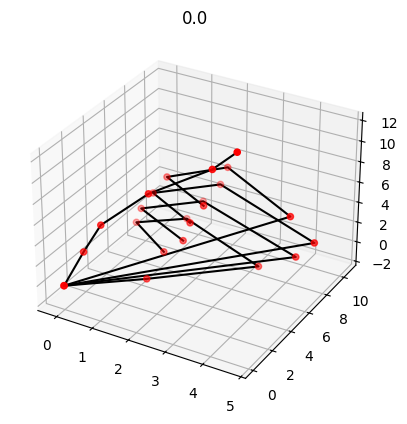

In [15]:
VisualizeLocation(all_data[0], points)

In [ ]:
data[0]['rot'][30]

In [ ]:
x, yx, yy, yz = PlotRotation(data)

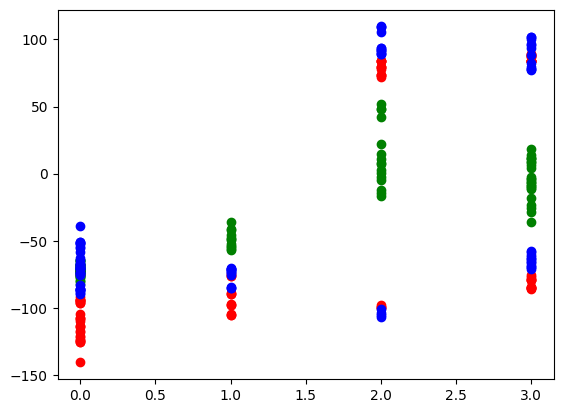

In [15]:
x, yx, yy, yz = VisualiseData(start=20, end=24, hand=1)

plt.scatter(x=x, y=yx, color='r')
plt.scatter(x=x, y=yy, color='g')
plt.scatter(x=x, y=yz, color='b')